In [20]:
from transforms import Deslant
from torchvision.transforms import Compose
from dataset import CTCData
import cv2
import matplotlib.pyplot as plt

In [21]:
def show_img(img):
    cv2.imshow('', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plot_img(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def bounding_box(x1,y1,x2,y2,img):
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img

In [22]:
import pandas as pd
import os
df = pd.read_csv('../../Dataset/DIDA/DIDA_Label1.csv').astype(str)
word_df=df
chars = []
word_col=-1
word_df.iloc[:, word_col].apply(lambda x: chars.extend(list(x)))
# 
# chars = sorted(list(set(chars)))
# char_dict = {c:i for i, c in enumerate(chars, 1)}

0       None
1       None
2       None
3       None
4       None
        ... 
1855    None
1856    None
1857    None
1858    None
1859    None
Name: word, Length: 1860, dtype: object

In [23]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [24]:
# Xử lý ảnh
path="../../Dataset/Vietnamese_gg_font/data/"
path2="../../Dataset/Vietnamese_gg_font/data_2/"

for filename in os.listdir(path):
    full_path=os.path.join(path,filename)
    img=cv2.imread(full_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh=thresholding(gray)
    cv2.imwrite(path2+filename,thresh)

In [25]:
batch_size=30

In [26]:
from dataset import CTCData
from dataloader import CTCDataLoader
from transforms import Rescale, Deslant, toRGB, ToTensor, Normalise
from torchvision.transforms import Compose
import torch

# use gpu if available
dev = "cuda" if torch.cuda.is_available() else "cpu"
# dev="cpu"
# create the CTCDataset
csv_name="data.csv"
data_path="../../Dataset/Vietnamese_gg_font/data_2/"
dataset = CTCData(csv_file=csv_name,                                               # csv name
        root_dir=data_path,  # root directory of csv and images
                  transform=Compose([                                                     # compose sequence of transforms
                   # Deslant(),                                                           # Deslant whole dataset before.
                     Rescale(output_size=(64, 800),                                       # one key part is that the image
                            random_pad=True,                                              # is rotated 90 degrees (w, h)
                            border_pad=(4, 10), 
                            random_rotation=2,                                            # random angle rotation (+/-)
                            random_stretch=1.2),                                          # randomly stretch the line (up to)
                     toRGB(),                                                            # converted to RGB - imagenet 
                     ToTensor(rgb=True),                                                 # was 3 channel images
                      Normalise(mean=[0.485, 0.456, 0.406],                              # pretrained resnet
                                  std=[0.229, 0.224, 0.225])]))                          # must use imagenet stats!

# Create a dataloader
dl = CTCDataLoader(dataset,                                                              # pass the dataset
                   batch_size=(batch_size,batch_size*2),                                                 # train batchsize, val batchsize
                   validation_split=0.2,                                                 # size of validation split [0-1]
                   shuffle=True,                                                         # shuffle the dataset
                   seed=42,                                                              # random seed - for reproducibility
                   device=dev)                                                           # on CPU or GPU?

In [27]:
print("max_len: ", dataset.max_len)
print("char_dict: ",dataset.char_dict)

max_len:  61
char_dict:  {' ': 1, '"': 2, '%': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, '/': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, 'A': 22, 'B': 23, 'C': 24, 'D': 25, 'F': 26, 'G': 27, 'H': 28, 'K': 29, 'L': 30, 'M': 31, 'N': 32, 'O': 33, 'P': 34, 'Q': 35, 'R': 36, 'S': 37, 'T': 38, 'V': 39, 'X': 40, 'Y': 41, 'a': 42, 'b': 43, 'c': 44, 'd': 45, 'e': 46, 'g': 47, 'h': 48, 'i': 49, 'k': 50, 'l': 51, 'm': 52, 'n': 53, 'o': 54, 'p': 55, 'q': 56, 'r': 57, 's': 58, 't': 59, 'u': 60, 'v': 61, 'x': 62, 'y': 63, 'à': 64, 'á': 65, 'â': 66, 'ã': 67, 'é': 68, 'ê': 69, 'ì': 70, 'í': 71, 'ò': 72, 'ó': 73, 'ô': 74, 'ù': 75, 'ú': 76, 'ă': 77, 'Đ': 78, 'đ': 79, 'ũ': 80, 'ơ': 81, 'ư': 82, 'ạ': 83, 'ả': 84, 'ấ': 85, 'ầ': 86, 'ẩ': 87, 'ẫ': 88, 'ậ': 89, 'ắ': 90, 'ằ': 91, 'ặ': 92, 'ẻ': 93, 'ế': 94, 'ề': 95, 'ể': 96, 'ễ': 97, 'ệ': 98, 'ỉ': 99, 'ị': 100, 'ọ': 101, 'ỏ': 102, 'ố': 103, 'ồ': 104, 'ổ': 105, 'ộ': 106, 'ớ': 107, 'ờ': 108, 'ở

In [28]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [11]:
# #For word_train
# from model import CTCModel
# from learn import Learner
# model = CTCModel(chan_in=3, 
#                 time_step=32, 
#                 feature_size=512, 
#                 hidden_size=512,
#                 output_size=len(dataset.char_dict) + 1, 
#                 num_rnn_layers=4, rnn_dropout=0)

# model.load_pretrained_resnet()                                                          # load some pretrained weights
# model.to(dev)   
# learn = Learner(model=model,                                                           
#                 dataloader=dl, # if you don't wish to train this can be lambda: (None, None)/Dataset and dataloader skipped.
#                 decode_map={v:k for k,v in dataset.char_dict.items()})   

# learn.load(f='weights/word/word.pth',                                                 
#            inv_f='weights/word/word_decode.pk',                                      
#            load_decode=False,                                                          
#            keep_LSTM=False,
#            freeze_conv=True)



In [12]:
# #For line train
# from model import CTCModel
# from learn import Learner
# model = CTCModel(chan_in=3, 
#                 time_step=32, 
#                 feature_size=512, 
#                 hidden_size=512,
#                 output_size=len(dataset.char_dict) + 1, 
#                 num_rnn_layers=4, rnn_dropout=0)

# model.load_pretrained_resnet()                                                          # load some pretrained weights
# model.to(dev)   
# learn = Learner(model=model,                                                           
#                 dataloader=dl, # if you don't wish to train this can be lambda: (None, None)/Dataset and dataloader skipped.
#                 decode_map={v:k for k,v in dataset.char_dict.items()})   

# learn.load(f='weights/line/lines.pth',                                                 
#            inv_f='weights/line/line_decode.pkl',                                      
#            load_decode=False,                                                          
#            keep_LSTM=False,
#            freeze_conv=True)


/home/vuong/Anh_Hung/OCR/OCR-handwritten/pytorch-ocr/transforms.py:129: FutureWarning: grey2rgb is deprecated. It will be removed in version 0.19.Please use gray2rgb instead.
  image = color.grey2rgb(image)


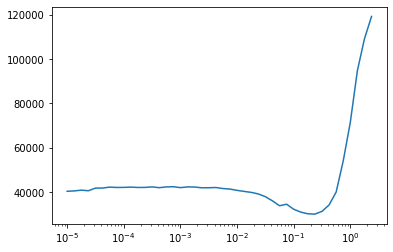

In [13]:
#Vietnamese
from model import CTCModel
model = CTCModel(chan_in=3,                                                             # 3 channel image - imagenet pretrained
                 time_step=96,                                                          # this is the max length possible                                                  
                 feature_size=512,                                                      # conv outputs 512, 32, 1
                 hidden_size=512,                        
                output_size=len(dataset.char_dict) + 1,                                 # output matrix has to have col for each letter
                 num_rnn_layers=4,                                                      # plus 1 for special blank character 
                 rnn_dropout=0)
model.load_pretrained_resnet()                                                          # load some pretrained weights
model.to(dev)                                                                           # put the model parameters on CPU/GPU
from learn import Learner
learn = Learner(model=model,                                                           
                dataloader=dl,                                                         
               decode_map={v:k for k,v in dataset.char_dict.items()})                  # inverse of char_dict

learn.load(f='weights/vietnamese_text/model_text.pth',                                                 
           inv_f='weights/vietnamese_text/decode_map_text.pk',                                      
           load_decode=False,                                                          
           keep_LSTM=True,
           freeze_conv=True)

learn.freeze()                                                                         # freeze the conv weights
log, lr = learn.find_lr(start_lr=1e-5, end_lr=1e1, wd=0.1)                             # find a suitable learning rate
#                                                                                        # wd = weight decay
# # based on https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html

In [15]:
# first run - frozen - just a demo - want to do more epochs if actual training
print('Training with ResNet parameters frozen')
learn.fit_one_cycle(epochs=20, max_lr=1e-3, base_lr=1e-4, wd=0.1)

# unfreeze all weights
print('Training with all parameters (CNN + LSTM) unfrozen')
learn.unfreeze()
learn.fit_one_cycle(epochs=20, max_lr=1e-3, base_lr=1e-4, wd=0.1)

Training with ResNet parameters frozen
epoch 1: train loss 193139.828125 | valid loss 172278.21875 | CER 1.5164781794213558 | IER 1.0
TRAIN LEVEN 2.2697498650350907 | VAL LEVEN 2.1672101574967044
epoch 2: train loss 73117.0234375 | valid loss 105221.6484375 | CER 1.20523138832998 | IER 1.0
TRAIN LEVEN 1.3659003831417624 | VAL LEVEN 1.4543120793727884
epoch 3: train loss 52279.484375 | valid loss 73846.234375 | CER 1.001734545202248 | IER 1.0
TRAIN LEVEN 1.3235549383787537 | VAL LEVEN 1.2982030111704712
epoch 4: train loss 36337.81640625 | valid loss 55315.2109375 | CER 0.9578852424894193 | IER 1.0
TRAIN LEVEN 1.2719702338766832 | VAL LEVEN 1.3056268646360925
epoch 5: train loss 27386.1953125 | valid loss 41048.67578125 | CER 0.9690557135918962 | IER 1.0
TRAIN LEVEN 1.3121775025799793 | VAL LEVEN 1.335114133074308
epoch 6: train loss 20372.26171875 | valid loss 31150.9921875 | CER 0.9702352043294248 | IER 1.0
TRAIN LEVEN 1.4081702711980775 | VAL LEVEN 1.3737598001803928
epoch 7: train l

In [16]:
learn.save(f='weights/vietnamese_text/model_text.pth',inv_f='weights/vietnamese_text/decode_map_text.pk')

single batch prediction of train dataset


/home/vuong/Anh_Hung/OCR/OCR-handwritten/pytorch-ocr/learn.py:273: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  img = rgb2grey(img)


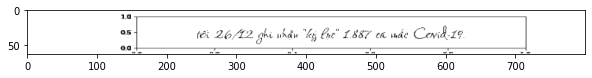

actual: tối 26/12 ghi nhận "kỷ lục" 1.887 ca mắc Covid-19.
pred:   ,


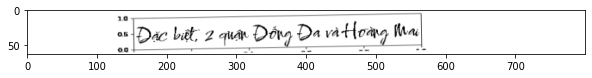

actual: Đặc biệt, 2 quận Đống Đa và Hoàng Mai
pred:   ,


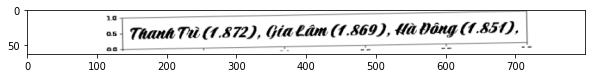

actual: Thanh Trì (1.872), Gia Lâm (1.869), Hà Đông (1.851),
pred:   Đ.


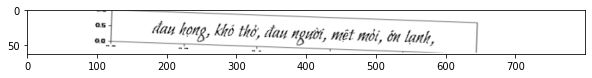

actual: đau họng, khó thở, đau người, mệt mỏi, ớn lạnh,
pred:   ,


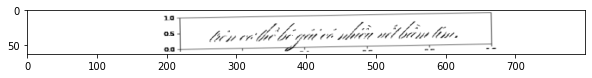

actual: trên cơ thể bé gái có nhiều vết bầm tím,
pred:   ,
single batch prediction of valid dataset


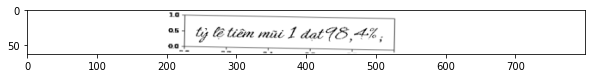

actual: tỷ lệ tiêm mũi 1 đạt 98,4%;
pred:   ,


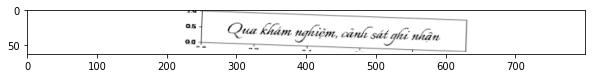

actual: Qua khám nghiệm, cảnh sát ghi nhận
pred:   ,


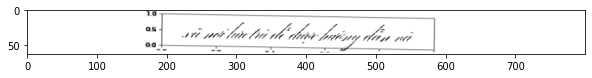

actual: xã nơi lưu trú để được hướng dẫn và
pred:   ,


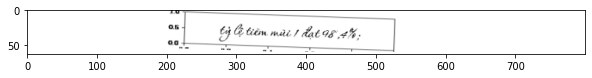

actual: tỷ lệ tiêm mũi 1 đạt 98,4%;
pred:   ,


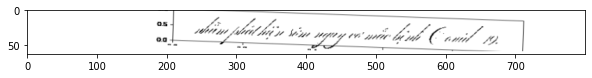

actual: nhằm phát hiện sớm nguy cơ mắc bệnh Covid-19.
pred:   ,


In [17]:
learn.batch_predict(show_img=True, up_to=5,dataloader="both")

In [ ]:
# #Xử lý ảnh
# path="images/"
# path2="demo/"

# for filename in os.listdir(path):
#     full_path=os.path.join(path,filename)
#     img=cv2.imread(full_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     thresh=thresholding(gray)
#     cv2.imwrite(path2+filename,thresh)
# # learn.predict(img_path='images/output_17_15.png',show_img=True,transforms=ToTensor())

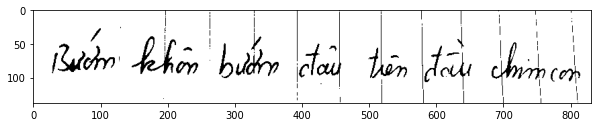

,


','

In [18]:
learn.predict(img_path='demo/test4.png',show_img=True,transforms=Compose([                                                     # compose sequence of transforms
                   # Deslant(),                                                           # Deslant whole dataset before.
                     Rescale(output_size=(64, 800),                                       # one key part is that the image
                            random_pad=True,                                              # is rotated 90 degrees (w, h)
                            border_pad=(4, 10), 
                            random_rotation=2,                                            # random angle rotation (+/-)
                            random_stretch=1.2),                                          # randomly stretch the line (up to)
                     toRGB(),                                                            # converted to RGB - imagenet 
                     ToTensor(rgb=True),                                                 # was 3 channel images
                      Normalise(mean=[0.485, 0.456, 0.406],                              # pretrained resnet
                                  std=[0.229, 0.224, 0.225])]),dev='cuda')